# Assignment 4 - Data Visualization I

Problem Statement

Use the inbuilt dataset 'titanic'. The dataset contains 891 rows and contains information about the passengers who boarded the unfortunate Titanic ship. Use the Seaborn library to see if we can find any patterns in the data.
Write a code to check how the price of the ticket (column name: 'fare') for each passenger is distributed by plotting a histogram.

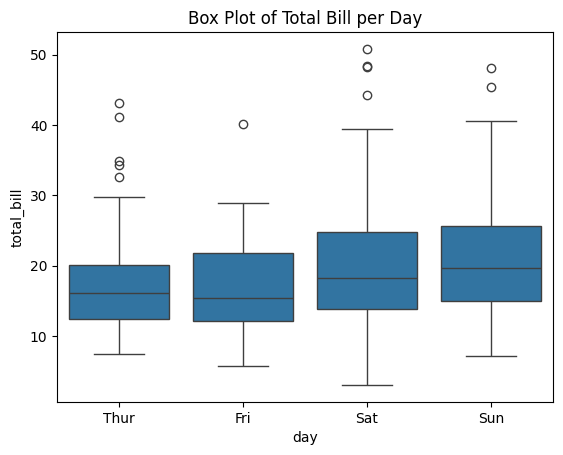